In [70]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from iexfinance.stocks import Stock, get_historical_data
from iexfinance.refdata import get_symbols
import os
key = os.getenv('IEX_TOKEN')
plt.rcParams['figure.figsize'] = [15, 8]

In [107]:
class Signals():
    def __init__(self, symbol, start, end, window1, window2):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.window1 = window1
        self.window2 = window2
        self.data = get_historical_data(self.symbol, self.start, self.end, close_only=True, output_format='pandas')
    
    def SMA(self):
        short = data['close'].rolling(window=self.window1).mean()
        long = data['close'].rolling(window=self.window2).mean()
        plt.plot(short, label='15 day SMA')
        plt.plot(long, label='30 day SMA')
        plt.plot(data['close'], label='close')
        plt.legend()
        plt.show()
    
    def EMA(self):
        short = data['close'].ewm(span=self.window1).mean()
        long = data['close'].ewm(span=self.window2).mean()
        plt.plot(short, label='15 day SMA')
        plt.plot(long, label='30 day SMA')
        plt.plot(data['close'], label='close')
        plt.legend()
        plt.show()
    
    def MACD(self, window):
        short = data['close'].ewm(span=self.window1).mean()
        long = data['close'].ewm(span=self.window2).mean()
        macd = short - long
        smoothed = macd.ewm(span=window, adjust=False).mean()
        plt.plot(macd, label='macd')
        plt.plot(smoothed, label='smoothed')
        plt.legend()
        plt.show()

In [108]:
g = Signals('EWH', start=datetime(2018, 1, 1), end=datetime(2019,11,25), window1=15, window2=30)

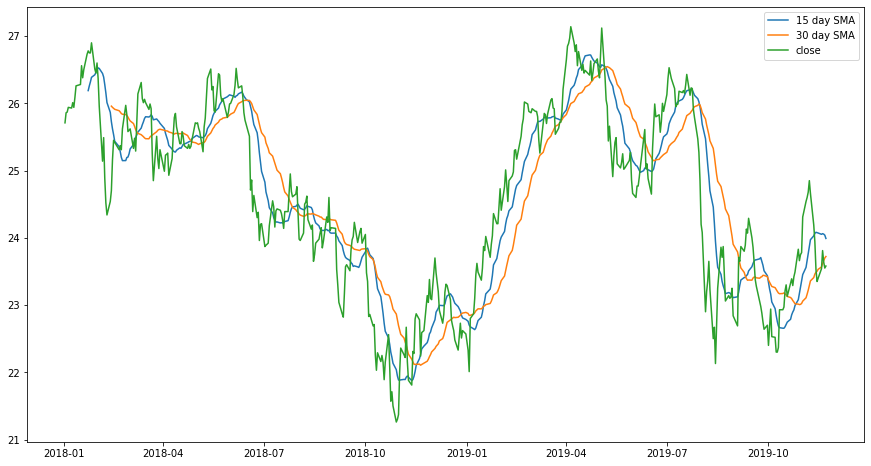

In [109]:
g.SMA()

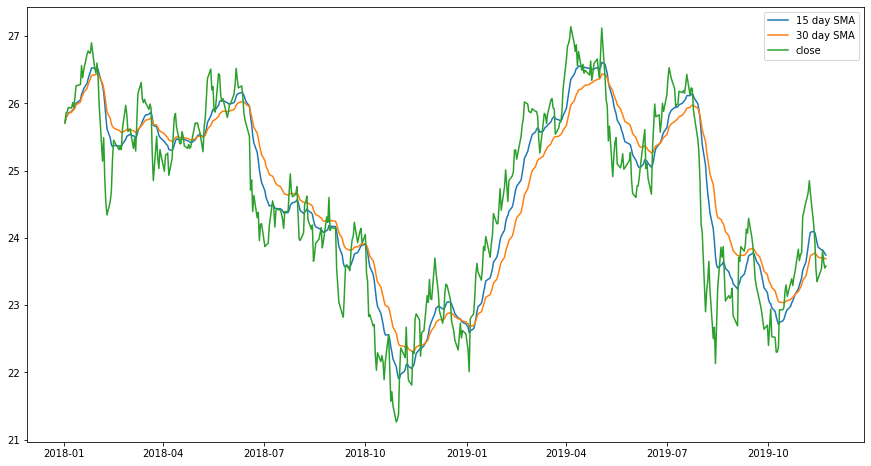

In [110]:
g.EMA()

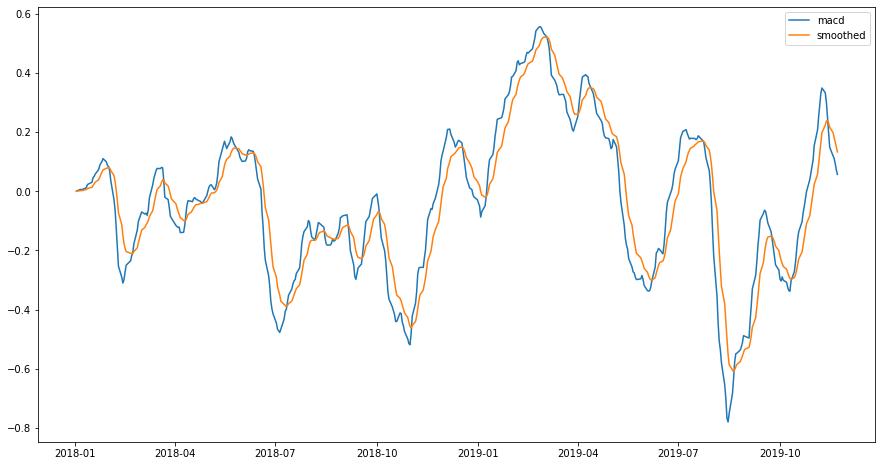

In [111]:
g.MACD(10)